# Cyclistic Case Study: Data Cleaning and Analysis

Hello and welcome to the Jupyter Notebook where all the magic happens! ;)

Below I have provided the Python code that I used to clean and manipulate the Cyclistic data for analysis.

In [1]:
# the usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

## Read in the Data
Since this report is being produced in 2023, I decided to use the company's historical data from 2022. The dataset therefore spans from January 1st, 2022 to December 31st, 2022. This will allow us to identify trends in how customers utilize Cyclistic's bikes over the course of a year.

In [2]:
# merging the files
joined_files = os.path.join("/Users/emmabradley/Desktop/cyclistic_data", "divvy-tripdata-*.csv")
  
# get a list of all joined files
joined_list = glob.glob(joined_files)
  
# finally join the files
my_df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

## Data Cleaning
Let's start by making a copy of our original dataset. This is a good practice as it will allow us to manipulate the copied data while retaining the original, unedited dataset. 

Additionally, let's take a look at the columns that this dataset contains! We see that each row of the data represents an actual ride that a customer took. For each ride, we have information pertaining to the type of bike they chose, where and when their ride started and ended, as well as whether or not they are an annual or casual member of Cyclistic.

In [3]:
# make a copy of the dataset 
df = my_df

# check columns
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual


### Data Types

First, let's go ahead and double check that all of the datatypes are what we expect them to be. 

In [4]:
# check column data types
df.info()

# get a summary of the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


### Missing Values

We should also check for missing values as this will impact our analysis. The function below counts exactly how many missing values there are in each column.

In [5]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

We find that there are quite a few missing values in the columns pertaining to the station names as well as the latitudes and longitudes. Since these columns aren't central to our analysis, we will go ahead and drop them from our dataset.

In [6]:
# drop unnecessary columns
df = my_df.drop(columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng', 
                           'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])

# view dataset
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,casual


### Calculating Ride Length
Since it will be ueful in our analysis, we will go ahead and calculate the ride length of each entry in the dataset. To do so, we will first need to convert our 'start_time' and 'end_time' columns into the datetime format so that we can use the assocated functions.

Additionally, there are some rides in the dataset that have a negative or zero value. This is because these bikes were taken out of circulation for Quality Control reasons and they don't represent actual rides taken by Cyclistic customers. We will go ahead and delete all of these rides.

In [7]:
# convert dates and times to the datetime format
end = pd.to_datetime(df['ended_at'])
start = pd.to_datetime(df['started_at'])

# calculate ride length in minutes
df['ride_length'] = (end - start).dt.total_seconds().div(60)

# remove rides with a negative or zero ride_length
df = df[df['ride_length'] > 0]

### Day of the Week & Month
Since we are interested in how annual and casual members of Cyclistic are using the bikes, it would be helpful if we had columns indicating the day of the week as well as the month of the year that each ride took place. To determine this, we will use the 'start_time' column to extract the dates.

In [8]:
# determine day of week
df['day_of_week'] = start.dt.day_name()

# determine month
df['month'] = start.dt.month_name()

# view dataset
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week,month
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,member,9.266667,Monday,December
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,casual,26.183333,Sunday,December
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,member,12.100000,Tuesday,December
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,member,29.016667,Tuesday,December
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,casual,14.183333,Wednesday,December


### Check for Duplicates

Since each ride is represented by a unique ride_id, there should be no duplicates in this column.

In [9]:
sum(df['ride_id'].duplicated())

0

### Categorical Data and Typos

There are a few columns in our dataframe that are categorical. Let's double check that there aren't any typos in any of these columns by printing the unique values.

In [10]:
for col in ['rideable_type', 'member_casual']:
    print(df[col].unique())

['electric_bike' 'classic_bike' 'docked_bike']
['member' 'casual']


### Summary Statistics

To get a better feel for our data, let's take a look at the summary statistics.

Upon first glance, we see that the average ride that a casual rider takes is over twice as long as that of an annual member. Additionally, the standard deviation of the casual rides is significantly greater than the standard deviation of the member rides indicating that the spread of the casual rider data is significantly greater than the spread of the annual member data.

In [11]:
# formatting
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# summary statistics
print('Annual Member Ride Length Statistics (mins): ')
print(df['ride_length'][df['member_casual'] == 'member'].describe())

print('\n' + 'Casual Rider Ride Length Statistics (mins): ')
print(df['ride_length'][df['member_casual'] == 'casual'].describe())

Annual Member Ride Length Statistics (mins): 
count   3345417.0
mean         12.7
std          28.8
min           0.0
25%           5.1
50%           8.8
75%          15.3
max        1559.9
Name: ride_length, dtype: float64

Casual Rider Ride Length Statistics (mins): 
count   2321769.0
mean         29.1
std         272.6
min           0.0
25%           7.3
50%          13.0
75%          24.1
max       41387.2
Name: ride_length, dtype: float64


### Outliers

An outlier is defined as any data point outside the range of 1.5 times the IQR (Interquartile Range) below the 25th percentile or above the 75th percentile. We will go ahead and check for outliers in the 'ride_length' column of our dataset.

In [14]:
members = df['ride_length'][df['member_casual'] == 'member']

Q1 = members.quantile(0.25)
Q3 = members.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = members[(df['ride_length'] < Q1 - threshold * IQR) | (df['ride_length'] > Q3 + threshold * IQR)]

print(outliers)

46        86.8
150       70.7
162       38.4
183       33.8
190       32.6
          ... 
5667604   34.6
5667610   61.6
5667615   40.9
5667620   75.0
5667632   36.2
Name: ride_length, Length: 202527, dtype: float64


In [15]:
casual = df['ride_length'][df['member_casual'] == 'casual']

Q1 = casual.quantile(0.25)
Q3 = casual.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = casual[(df['ride_length'] < Q1 - threshold * IQR) | (df['ride_length'] > Q3 + threshold * IQR)]
outliers

88         174.0
855        422.4
983        177.5
995         84.9
1128       209.9
           ...  
5667671     53.3
5667687     50.7
5667689     63.5
5667696   1499.9
5667700     55.0
Name: ride_length, Length: 202299, dtype: float64

<AxesSubplot:title={'center':'ride_length'}, xlabel='member_casual'>

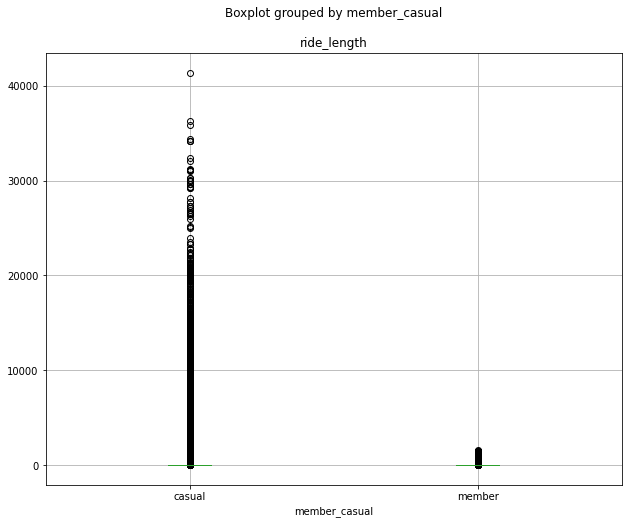

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['ride_length'], by='member_casual', ax=ax)

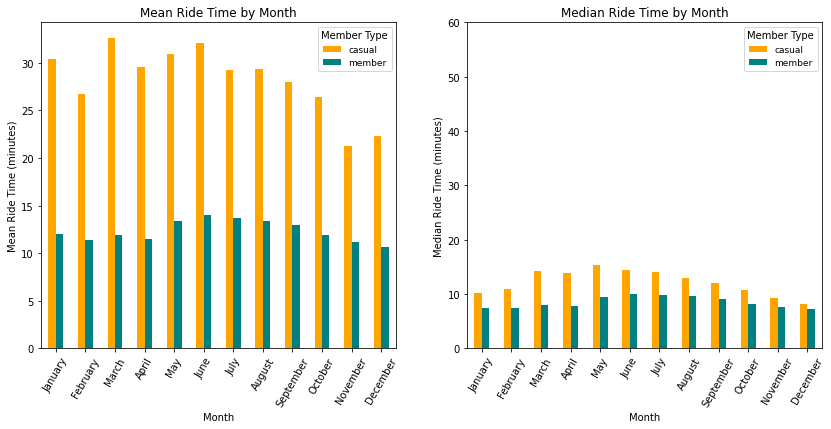

In [17]:
# set order
month_order = pd.CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May',
                                             'June', 'July', 'August', 'September',
                                             'October', 'November', 'December'], ordered=True)
df['month'] = df['month'].astype(month_order)

# compute statistics
grouped = df.groupby(['month', 'member_casual'])['ride_length'].mean()
grouped1 = df.groupby(['month', 'member_casual'])['ride_length'].median()

# plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = grouped.unstack().plot(kind='bar', 
                       ax = ax1,
                       title='Mean Ride Time by Month',
                       xlabel = 'Month',
                       ylabel = 'Mean Ride Time (minutes)',
                       figsize = (14,6),
                       fontsize = 10,
                       rot = 60,
                       color = {'teal', 'orange'}
                      )
plt.ylim(0,60)

ax2 = grouped1.unstack().plot(kind='bar', 
                       ax = ax2,
                       title='Median Ride Time by Month',
                       xlabel = 'Month',
                       ylabel = 'Median Ride Time (minutes)',
                       figsize = (14,6),
                       fontsize = 10,
                       rot = 60,
                       color = {'teal', 'orange'}
                      )

# format legend
ax1.legend(loc='upper right', 
           bbox_to_anchor=(1, 1),
           title = 'Member Type',
           fontsize = 9)


ax2.legend(loc='upper right', 
           bbox_to_anchor=(1, 1), 
           title = 'Member Type', 
           fontsize = 9)

# display
plt.show()

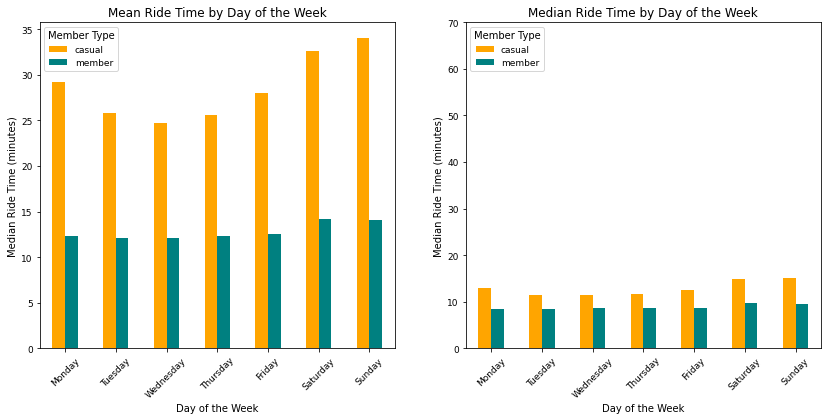

In [19]:
# set order
day_order = pd.CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                             'Saturday', 'Sunday'], ordered=True)
df['day_of_week'] = df['day_of_week'].astype(day_order)

# compute statistics
grouped1 = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean()
grouped2 = df.groupby(['day_of_week', 'member_casual'])['ride_length'].median()

# plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))

ax1 = grouped1.unstack().plot(kind='bar', 
                              ax = ax1,
                       title='Mean Ride Time by Day of the Week',
                       xlabel = 'Day of the Week',
                       ylabel = 'Median Ride Time (minutes)',
                       figsize = (14,6),
                       fontsize = 9,
                       rot = 45,
                       color = {'teal', 'orange'}
                      )

ax2 = grouped2.unstack().plot(kind='bar', 
                              ax = ax2,
                       title='Median Ride Time by Day of the Week',
                       xlabel = 'Day of the Week',
                       ylabel = 'Median Ride Time (minutes)',
                       figsize = (14,6),
                       fontsize = 9,
                       rot = 45,
                       color = {'teal', 'orange'}
                      )
plt.ylim(0,70)

# format legend
ax1.legend(loc='upper left', 
           bbox_to_anchor=(0, 1),
           title = 'Member Type', 
           fontsize = 9)


ax2.legend(loc='upper left', 
           bbox_to_anchor=(0, 1), 
           title = 'Member Type', 
           fontsize = 9)

# display
plt.show()

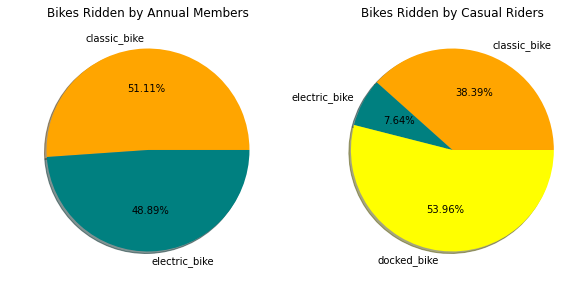

In [18]:
pie1 = df[df['member_casual'] == 'member'][['member_casual', 'rideable_type']]
pie2 = df[df['member_casual'] == 'casual'][['member_casual', 'rideable_type']]
                                            
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))

labels = ['classic_bike', 'electric_bike', 'docked_bike']

colours = {'classic_bike': 'orange',
           'electric_bike': 'teal',
           'docked_bike': 'yellow'}


pie1.groupby('rideable_type')['rideable_type'].count().plot.pie(figsize = (10,10),
                                                               title = 'Bikes Ridden by Annual Members',
                                                               fontsize = 10,
                                                               ax = ax1,
                                                               autopct='%1.2f%%',
                                                               labels = labels,
                                                               ylabel = ' ',
                                                               shadow = True,
                                                               colors=[colours[key] for key in labels])

pie2.groupby('rideable_type')['rideable_type'].count().plot.pie(figsize = (10,10),
                                                               title = 'Bikes Ridden by Casual Riders',
                                                               fontsize = 10,
                                                               ax = ax2,
                                                               autopct='%1.2f%%',
                                                               labels = labels,
                                                               ylabel = ' ',
                                                               shadow = True,
                                                               colors=[colours[key] for key in labels])

# display
plt.show()

In [ ]:
# add box plot
# add frequency description